In [483]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import ast
import matplotlib.pyplot as plt
import pickle

# Import the machine learning tools
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Preprocessing and Exploratory Data Analysis

In [357]:
# Read CSV files
movies_df = pd.read_csv("Resources/movies_metadata.csv")
#ratings_df = pd.read_csv("Resources/ratings.csv")

# Display dfs
movies_df.head()

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [592]:
# Create a df to understand budget over time
budget_exploration_df = movies_df.dropna()[['budget','release_date']]
budget_exploration_df

,budget,release_date
0,30000000,1995-10-30
1,65000000,1995-12-15
2,0,1995-12-22
3,16000000,1995-12-22
4,0,1995-02-10
...,...,...
45460,0,1991-05-13
45462,0,2011-11-17
45463,0,2003-08-01
45464,0,1917-10-21


/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='release_date'>

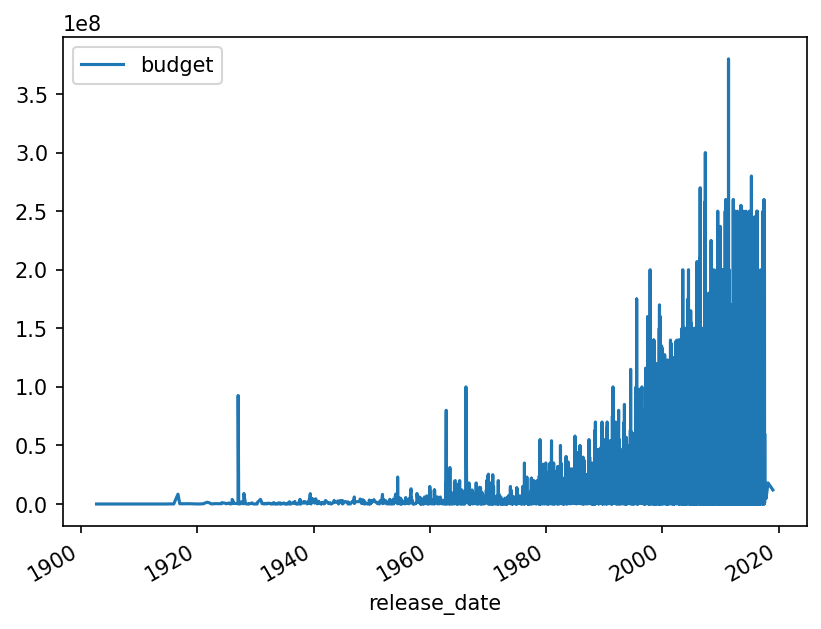

In [594]:
# Plot release date vs budget
budget_exploration_df['release_date'] = pd.to_datetime(budget_exploration_df['release_date'], format='%Y-%m-%d %H:%M:%S')
budget_exploration_df['budget']=budget_exploration_df['budget'].astype('int32')
budget_exploration_df = budget_exploration_df.loc[budget_exploration_df['budget']!=0]
budget_exploration_df.plot.line(x = 'release_date', y = 'budget')

In [358]:
# Review the the data types of each column
movies_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [359]:
# Drop unnecessary columns
movies_df.drop(columns=['homepage', 'original_title', 'video', 'overview', 'belongs_to_collection', 'imdb_id', 'poster_path',
                       'title', 'production_companies', 'production_countries', 'tagline', 'adult', 'spoken_languages', 'id'], inplace=True)
movies_df.head()

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Released,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,1995-12-22,81452156.0,127.0,Released,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,1995-02-10,76578911.0,106.0,Released,5.7,173.0


In [360]:
# Review the resulting dataframe to ensure columns were dropped
movies_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Released,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,1995-12-22,81452156.0,127.0,Released,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,1995-02-10,76578911.0,106.0,Released,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,0.072051,NaN,0.0,90.0,Released,4.0,1.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",tl,0.178241,2011-11-17,0.0,360.0,Released,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,0.903007,2003-08-01,0.0,90.0,Released,3.8,6.0
45464,0,[],en,0.003503,1917-10-21,0.0,87.0,Released,0.0,0.0


In [361]:
# Drop all rows with NULL values
movies_df.dropna()

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Released,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,1995-12-22,81452156.0,127.0,Released,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,1995-02-10,76578911.0,106.0,Released,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,5.683753,1991-05-13,0.0,104.0,Released,5.7,26.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",tl,0.178241,2011-11-17,0.0,360.0,Released,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,0.903007,2003-08-01,0.0,90.0,Released,3.8,6.0
45464,0,[],en,0.003503,1917-10-21,0.0,87.0,Released,0.0,0.0


In [362]:
# Filter the data frame to include Vote Counts that are greater than or equal to 100
vote_count_df = movies_df.loc[movies_df['vote_count']>=100]
vote_count_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,1995-02-10,76578911.0,106.0,Released,5.7,173.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,6.677277,1995-12-15,0.0,127.0,Released,6.2,141.0
...,...,...,...,...,...,...,...,...,...,...
45265,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",sv,12.165685,2014-08-15,1359497.0,118.0,Released,6.8,255.0
45268,5402000,"[{'id': 35, 'name': 'Comedy'}]",fr,5.613875,2016-02-24,0.0,100.0,Released,5.3,153.0
45343,25868826,"[{'id': 35, 'name': 'Comedy'}]",fr,7.29492,2016-03-23,0.0,110.0,Released,4.0,167.0
45437,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",en,20.82178,2017-06-01,0.0,4.0,Released,8.3,146.0


In [363]:
# Filter the data frame to include movie Runtimes that are greater than or equal to 60 minutes
runtime_df = vote_count_df.loc[vote_count_df['runtime']>=60]
runtime_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,1995-02-10,76578911.0,106.0,Released,5.7,173.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,6.677277,1995-12-15,0.0,127.0,Released,6.2,141.0
...,...,...,...,...,...,...,...,...,...,...
45258,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 107...",en,15.842073,2017-07-21,0.0,111.0,Released,7.5,171.0
45265,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",sv,12.165685,2014-08-15,1359497.0,118.0,Released,6.8,255.0
45268,5402000,"[{'id': 35, 'name': 'Comedy'}]",fr,5.613875,2016-02-24,0.0,100.0,Released,5.3,153.0
45343,25868826,"[{'id': 35, 'name': 'Comedy'}]",fr,7.29492,2016-03-23,0.0,110.0,Released,4.0,167.0


In [364]:
# Generate descriptive statistics for the movie Budgets
runtime_df['budget'].astype('int32').describe()

count    5.970000e+03
mean     2.689196e+07
std      3.997365e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.200000e+07
75%      3.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [365]:
# Calculate the median movie Budget to account for outliers
runtime_df['budget'].astype('int32').median()

12000000.0

In [366]:
# Review the the data types of each column
runtime_df.dtypes

budget                object
genres                object
original_language     object
popularity            object
release_date          object
revenue              float64
runtime              float64
status                object
vote_average         float64
vote_count           float64
dtype: object

In [367]:
# Convert the the data types of each column
runtime_df['budget']=runtime_df['budget'].astype('int32')
runtime_df['release_date'] = pd.to_datetime(runtime_df['release_date'], format='%Y-%m-%d %H:%M:%S')
runtime_df['popularity'] = runtime_df['popularity'].astype('float64')

runtime_df.dtypes

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A val

budget                        int32
genres                       object
original_language            object
popularity                  float64
release_date         datetime64[ns]
revenue                     float64
runtime                     float64
status                       object
vote_average                float64
vote_count                  float64
dtype: object

In [368]:
# Filter the dataframe to include movies with Budgets of $1,000,000 or more
budget_df = runtime_df.loc[runtime_df['budget']>=1000000]
budget_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,6.677277,1995-12-15,0.0,127.0,Released,6.2,141.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0
...,...,...,...,...,...,...,...,...,...,...
45031,15000000,"[{'id': 28, 'name': 'Action'}]",en,47.114366,2017-03-04,0.0,87.0,Released,6.0,113.0
45139,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0
45167,11000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,40.796775,2017-08-03,184770205.0,111.0,Released,7.4,181.0
45268,5402000,"[{'id': 35, 'name': 'Comedy'}]",fr,5.613875,2016-02-24,0.0,100.0,Released,5.3,153.0


In [591]:
# Check the value counts for the status
budget_df['status'].value_counts()

Released           4167
Post Production       1
Name: status, dtype: int64

In [370]:
# Filter the dataframe to include Released movies only
status_df = budget_df.loc[budget_df['status']=='Released']
status_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,6.677277,1995-12-15,0.0,127.0,Released,6.2,141.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0
...,...,...,...,...,...,...,...,...,...,...
45031,15000000,"[{'id': 28, 'name': 'Action'}]",en,47.114366,2017-03-04,0.0,87.0,Released,6.0,113.0
45139,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0
45167,11000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,40.796775,2017-08-03,184770205.0,111.0,Released,7.4,181.0
45268,5402000,"[{'id': 35, 'name': 'Comedy'}]",fr,5.613875,2016-02-24,0.0,100.0,Released,5.3,153.0


In [371]:
# Filter the dataframe to include movies with Revenues greater than $0
revenue_df = status_df.loc[status_df['revenue']!=0]
revenue_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,1995-11-16,352194034.0,130.0,Released,6.6,1194.0
...,...,...,...,...,...,...,...,...,...,...
44821,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",ja,6.480376,2000-07-08,68411275.0,93.0,Released,6.0,144.0
44842,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,2017-06-21,604942143.0,149.0,Released,6.2,1440.0
45014,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,2017-08-03,71000000.0,95.0,Released,5.7,688.0
45139,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0


In [372]:
# Examine the values in the 'original_language' column
revenue_df['original_language'].value_counts()

en    3476
fr      54
ja      27
es      25
it      14
de      12
zh      11
cn       9
hi       9
da       9
ko       8
pt       3
ru       3
sv       3
id       3
xx       2
th       2
hu       2
te       2
nl       1
he       1
nb       1
pl       1
tr       1
no       1
Name: original_language, dtype: int64

In [373]:
# Add the 'original_language' values to a list and remove 'en'
fl =list(revenue_df['original_language'].unique())
fl.remove('en')
fl

['fr',
 'cn',
 'it',
 'de',
 'ja',
 'pt',
 'es',
 'xx',
 'da',
 'zh',
 'hi',
 'ko',
 'ru',
 'th',
 'nl',
 'he',
 'sv',
 'nb',
 'id',
 'pl',
 'hu',
 'tr',
 'te',
 'no']

In [374]:
# Loop though the 'original_language' column and replace all foreign language values with 'fl'
for for_lang in fl:
    revenue_df['original_language']= revenue_df['original_language'].replace(for_lang,"fl")
revenue_df

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,1995-11-16,352194034.0,130.0,Released,6.6,1194.0
...,...,...,...,...,...,...,...,...,...,...
44821,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,2000-07-08,68411275.0,93.0,Released,6.0,144.0
44842,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,2017-06-21,604942143.0,149.0,Released,6.2,1440.0
45014,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,2017-08-03,71000000.0,95.0,Released,5.7,688.0
45139,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0


In [375]:
# Reset the dataframe index
revenue_df.reset_index(drop=True, inplace=True)

In [376]:
# Review the dataframe to ensure the index was properly reset
revenue_df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,1995-11-16,352194034.0,130.0,Released,6.6,1194.0
...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,2000-07-08,68411275.0,93.0,Released,6.0,144.0
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,2017-06-21,604942143.0,149.0,Released,6.2,1440.0
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,2017-08-03,71000000.0,95.0,Released,5.7,688.0
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0


In [377]:
# Extract the year from the 'release_date' column and place the results in a separate column
revenue_df['year']=revenue_df['release_date'].dt.year
revenue_df

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count,year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0,1995
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0,1995
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0,1995
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0,1995
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,1995-11-16,352194034.0,130.0,Released,6.6,1194.0,1995
...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,2000-07-08,68411275.0,93.0,Released,6.0,144.0,2000
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,2017-06-21,604942143.0,149.0,Released,6.2,1440.0,2017
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,2017-08-03,71000000.0,95.0,Released,5.7,688.0,2017
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0,2017


In [378]:
# Extract the month from the 'release_date' column and place the results in a separate column
revenue_df['month']=revenue_df['release_date'].dt.month
revenue_df

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count,year,month
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Released,7.7,5415.0,1995,10
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Released,6.9,2413.0,1995,12
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,1995-12-15,187436818.0,170.0,Released,7.7,1886.0,1995,12
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,1995-12-22,64350171.0,106.0,Released,5.5,174.0,1995,12
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,1995-11-16,352194034.0,130.0,Released,6.6,1194.0,1995,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,2000-07-08,68411275.0,93.0,Released,6.0,144.0,2000,7
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,2017-06-21,604942143.0,149.0,Released,6.2,1440.0,2017,6
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,2017-08-03,71000000.0,95.0,Released,5.7,688.0,2017,8
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,2017-07-28,66913939.0,86.0,Released,5.8,327.0,2017,7


In [379]:
# Drop the 'release_date' column and review the dataframe to ensure it was properly removed
revenue_df.drop(['release_date'], axis=1, inplace=True)
revenue_df

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,budget,genres,original_language,popularity,revenue,runtime,status,vote_average,vote_count,year,month
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,373554033.0,81.0,Released,7.7,5415.0,1995,10
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,262797249.0,104.0,Released,6.9,2413.0,1995,12
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,187436818.0,170.0,Released,7.7,1886.0,1995,12
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,64350171.0,106.0,Released,5.5,174.0,1995,12
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,352194034.0,130.0,Released,6.6,1194.0,1995,11
...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,68411275.0,93.0,Released,6.0,144.0,2000,7
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,604942143.0,149.0,Released,6.2,1440.0,2017,6
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,71000000.0,95.0,Released,5.7,688.0,2017,8
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,66913939.0,86.0,Released,5.8,327.0,2017,7


In [380]:
# Create a column to determine if movie was released before 2005
# 1=yes successful, 0=no unsuccessful
revenue_df['post_streaming'] = 0
revenue_df

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,budget,genres,original_language,popularity,revenue,runtime,status,vote_average,vote_count,year,month,post_streaming
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,373554033.0,81.0,Released,7.7,5415.0,1995,10,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,262797249.0,104.0,Released,6.9,2413.0,1995,12,0
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,187436818.0,170.0,Released,7.7,1886.0,1995,12,0
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,64350171.0,106.0,Released,5.5,174.0,1995,12,0
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,352194034.0,130.0,Released,6.6,1194.0,1995,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,68411275.0,93.0,Released,6.0,144.0,2000,7,0
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,604942143.0,149.0,Released,6.2,1440.0,2017,6,0
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,71000000.0,95.0,Released,5.7,688.0,2017,8,0
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,66913939.0,86.0,Released,5.8,327.0,2017,7,0


In [381]:
# Convert the the data types of each column
revenue_df.dtypes

budget                 int32
genres                object
original_language     object
popularity           float64
revenue              float64
runtime              float64
status                object
vote_average         float64
vote_count           float64
year                   int64
month                  int64
post_streaming         int64
dtype: object

In [382]:
# Filter the dataframe to include movies with produced in 2005 or later
revenue_df.loc[revenue_df['year'] >= 2005, "post_streaming"] = 1  
revenue_df

/Users/yashkansal97/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,budget,genres,original_language,popularity,revenue,runtime,status,vote_average,vote_count,year,month,post_streaming
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,373554033.0,81.0,Released,7.7,5415.0,1995,10,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,262797249.0,104.0,Released,6.9,2413.0,1995,12,0
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,187436818.0,170.0,Released,7.7,1886.0,1995,12,0
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,64350171.0,106.0,Released,5.5,174.0,1995,12,0
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,352194034.0,130.0,Released,6.6,1194.0,1995,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,68411275.0,93.0,Released,6.0,144.0,2000,7,0
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,604942143.0,149.0,Released,6.2,1440.0,2017,6,1
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,71000000.0,95.0,Released,5.7,688.0,2017,8,1
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,66913939.0,86.0,Released,5.8,327.0,2017,7,1


In [383]:
# Drop the 'year' column and review the dataframe to ensure it was properly removed
movies_cleaned_df = revenue_df.drop(['year'], axis=1)
movies_cleaned_df

,budget,genres,original_language,popularity,revenue,runtime,status,vote_average,vote_count,month,post_streaming
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,373554033.0,81.0,Released,7.7,5415.0,10,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,262797249.0,104.0,Released,6.9,2413.0,12,0
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,187436818.0,170.0,Released,7.7,1886.0,12,0
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,64350171.0,106.0,Released,5.5,174.0,12,0
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,352194034.0,130.0,Released,6.6,1194.0,11,0
...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,68411275.0,93.0,Released,6.0,144.0,7,0
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,604942143.0,149.0,Released,6.2,1440.0,6,1
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,71000000.0,95.0,Released,5.7,688.0,8,1
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,66913939.0,86.0,Released,5.8,327.0,7,1


In [384]:
movies_cleaned_df.groupby('post_streaming').mean()['revenue']

post_streaming
0    1.080022e+08
1    1.415903e+08
Name: revenue, dtype: float64

In [385]:
# Create a list containing all the movie genre types
unique_genres=['History', 'Romance', 'Action', 'Documentary', 'Fantasy', 'Thriller', 'Family', 'Drama', 'Western', 'Crime',
 'Science Fiction', 'War', 'Mystery', 'Music', 'Animation', 'Comedy', 'Adventure', 'Horror']

In [386]:
# Create a list to contain the movie genres for each movie
big_list=[]

# Loop through all the movie genres and append them to big_list
for idx, genre_messy in movies_cleaned_df['genres'].iteritems():
    genre_list=[genre_dict['name'] for genre_dict in ast.literal_eval(genre_messy)]
    encoded=[]
    for genre in unique_genres: 
        if genre in genre_list: 
            encoded.append(1)
        else: 
            encoded.append(0)
    big_list.append(encoded)

In [387]:
# Create a dataframe containing the genres for each movie
genre_df=pd.DataFrame(big_list, columns=unique_genres)
genre_df.head()

,History,Romance,Action,Documentary,Fantasy,Thriller,Family,Drama,Western,Crime,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [388]:
# Concatenate the movies_cleaned_df and the genre_df
movies_final_df=pd.concat([movies_cleaned_df, genre_df], axis = 1)
movies_final_df

,budget,genres,original_language,popularity,revenue,runtime,status,vote_average,vote_count,month,...,Western,Crime,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,373554033.0,81.0,Released,7.7,5415.0,10,...,0,0,0,0,0,0,1,1,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,262797249.0,104.0,Released,6.9,2413.0,12,...,0,0,0,0,0,0,0,0,1,0
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,187436818.0,170.0,Released,7.7,1886.0,12,...,0,1,0,0,0,0,0,0,0,0
3,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.231580,64350171.0,106.0,Released,5.5,174.0,12,...,0,0,0,0,0,0,0,0,1,0
4,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,14.686036,352194034.0,130.0,Released,6.6,1194.0,11,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",fl,6.480376,68411275.0,93.0,Released,6.0,144.0,7,...,0,0,0,0,0,0,1,0,1,0
3676,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,39.186819,604942143.0,149.0,Released,6.2,1440.0,6,...,0,0,1,0,0,0,0,0,1,0
3677,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,50.903593,71000000.0,95.0,Released,5.7,688.0,8,...,1,0,1,0,0,0,0,0,0,1
3678,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,33.694599,66913939.0,86.0,Released,5.8,327.0,7,...,0,0,0,0,0,0,1,1,0,0


In [389]:
# Drop the 'genres' and 'status' columns and review the dataframe to ensure they were properly removed
movies_final_df.drop(columns=['genres', 'status'], axis=1, inplace=True)
movies_final_df

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,...,Western,Crime,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror
0,30000000,en,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,...,0,0,0,0,0,0,1,1,0,0
1,65000000,en,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60000000,en,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35000000,en,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58000000,en,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,fl,6.480376,68411275.0,93.0,6.0,144.0,7,0,0,...,0,0,0,0,0,0,1,0,1,0
3676,260000000,en,39.186819,604942143.0,149.0,6.2,1440.0,6,1,0,...,0,0,1,0,0,0,0,0,1,0
3677,60000000,en,50.903593,71000000.0,95.0,5.7,688.0,8,1,0,...,1,0,1,0,0,0,0,0,0,1
3678,50000000,en,33.694599,66913939.0,86.0,5.8,327.0,7,1,0,...,0,0,0,0,0,0,1,1,0,0


In [390]:
# Convert categorical variable into dummy/indicator variables
language_df = pd.get_dummies(movies_final_df['original_language'])
language_df

,en,fl
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3675,0,1
3676,1,0
3677,1,0
3678,1,0


In [391]:
# Drop the 'original_language' column and review the dataframe to ensure it was properly removed
movies_final_df.drop(['original_language'], axis=1, inplace=True)
movies_final_df

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,Western,Crime,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60000000,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35000000,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58000000,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,6.480376,68411275.0,93.0,6.0,144.0,7,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3676,260000000,39.186819,604942143.0,149.0,6.2,1440.0,6,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3677,60000000,50.903593,71000000.0,95.0,5.7,688.0,8,1,0,0,...,1,0,1,0,0,0,0,0,0,1
3678,50000000,33.694599,66913939.0,86.0,5.8,327.0,7,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [392]:
# Concatenate the movies_final_df and the language_df
final_df = pd.concat([movies_final_df, language_df], axis=1)
final_df

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror,en,fl
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,60000000,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,35000000,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,58000000,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,16000000,6.480376,68411275.0,93.0,6.0,144.0,7,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3676,260000000,39.186819,604942143.0,149.0,6.2,1440.0,6,1,0,0,...,1,0,0,0,0,0,1,0,1,0
3677,60000000,50.903593,71000000.0,95.0,5.7,688.0,8,1,0,0,...,1,0,0,0,0,0,0,1,1,0
3678,50000000,33.694599,66913939.0,86.0,5.8,327.0,7,1,0,0,...,0,0,0,0,1,1,0,0,1,0


In [393]:
# Explore correlations across the dataframe
final_df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror,en,fl
budget,1.000000,0.237738,0.706352,0.232795,-0.076661,0.534649,0.008910,0.162165,-0.006364,-0.108875,...,0.197933,0.001451,-0.042451,-0.056041,0.184471,-0.053131,0.390834,-0.170221,0.142984,-0.142984
popularity,0.237738,1.000000,0.394818,0.113706,0.134629,0.427942,0.000619,0.077228,-0.014426,-0.044569,...,0.074647,0.004858,-0.006384,-0.019271,0.065194,-0.042184,0.115407,-0.030766,0.042019,-0.042019
revenue,0.706352,0.394818,1.000000,0.235092,0.152454,0.745873,0.023590,0.088269,-0.041051,-0.047350,...,0.126668,-0.015764,-0.052713,-0.019858,0.188263,-0.024349,0.326058,-0.119510,0.103939,-0.103939
runtime,0.232795,0.113706,0.235092,1.000000,0.410198,0.266967,0.166191,-0.084254,0.287907,0.047471,...,-0.000817,0.202570,0.037391,0.018323,-0.259740,-0.283453,0.081940,-0.197495,-0.079971,0.079971
vote_average,-0.076661,0.134629,0.152454,0.410198,1.000000,0.351775,0.142242,-0.150921,0.130688,0.051575,...,-0.088934,0.113918,0.032185,0.034309,0.059536,-0.146964,-0.043930,-0.219026,-0.172161,0.172161
vote_count,0.534649,0.427942,0.745873,0.266967,0.351775,1.000000,0.017922,0.149431,-0.040345,-0.081167,...,0.195501,-0.006707,-0.016752,-0.048766,0.076701,-0.099678,0.232539,-0.094200,0.087185,-0.087185
month,0.008910,0.000619,0.023590,0.166191,0.142242,0.017922,1.000000,-0.070690,0.086554,-0.004903,...,-0.031546,0.045596,-0.016762,0.048433,0.022009,-0.049327,-0.001225,-0.050864,0.054631,-0.054631
post_streaming,0.162165,0.077228,0.088269,-0.084254,-0.150921,0.149431,-0.070690,1.000000,-0.012293,-0.021763,...,-0.039016,-0.031184,-0.029040,-0.032658,0.037575,0.009947,-0.026265,-0.007766,-0.065069,0.065069
History,-0.006364,-0.014426,-0.041051,0.287907,0.130688,-0.040345,0.086554,-0.012293,1.000000,-0.023569,...,-0.083066,0.341808,-0.046832,-0.012100,-0.056038,-0.131392,-0.005692,-0.071870,-0.057134,0.057134
Romance,-0.108875,-0.044569,-0.047350,0.047471,0.051575,-0.081167,-0.004903,-0.021763,-0.023569,1.000000,...,-0.108088,-0.012463,-0.074046,0.133568,-0.085453,0.195674,-0.129414,-0.134807,-0.001130,0.001130


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

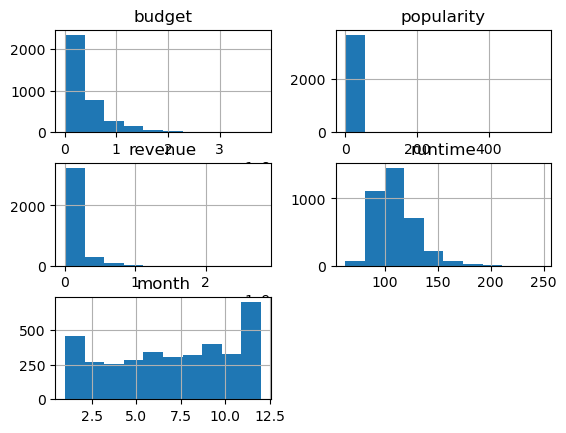

In [394]:
final_df.hist(['budget', 'popularity', 'revenue', 'runtime', 'month'])

In [395]:
# Ensure the data types are appropriate for the machine learning model
final_df.dtypes

budget               int32
popularity         float64
revenue            float64
runtime            float64
vote_average       float64
vote_count         float64
month                int64
post_streaming       int64
History              int64
Romance              int64
Action               int64
Documentary          int64
Fantasy              int64
Thriller             int64
Family               int64
Drama                int64
Western              int64
Crime                int64
Science Fiction      int64
War                  int64
Mystery              int64
Music                int64
Animation            int64
Comedy               int64
Adventure            int64
Horror               int64
en                   uint8
fl                   uint8
dtype: object

In [396]:
# Review the cleaned dataframe
final_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,Science Fiction,War,Mystery,Music,Animation,Comedy,Adventure,Horror,en,fl
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,60000000,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,35000000,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,58000000,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [397]:
# Replace zeros with NaNs to ensure the values are excluded from subsequent calculations
dirty_df=final_df[unique_genres].replace(0, np.nan)
genre_scores_df=dirty_df[unique_genres].multiply(final_df['vote_average'], axis=0).mean()

# Calculate the Anticipated Vote and store the values in a separate column
anticipated_vote_rating=dirty_df[unique_genres].multiply(genre_scores_df, axis=1).mean(axis=1)
final_df['anticipated_vote_rating']=anticipated_vote_rating
final_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,War,Mystery,Music,Animation,Comedy,Adventure,Horror,en,fl,anticipated_vote_rating
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,0,...,0,0,0,1,1,0,0,1,0,6.369966
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,0,...,0,0,0,0,0,1,0,1,0,6.300140
2,60000000,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,0,...,0,0,0,0,0,0,0,1,0,6.412141
3,35000000,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,0,...,0,0,0,0,0,1,0,1,0,6.255829
4,58000000,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,0,...,0,0,0,0,0,1,0,1,0,6.255829


In [398]:
# Review the scores associated with each genre
genre_scores_df

History            6.911842
Romance            6.488455
Action             6.189252
Documentary        6.800000
Fantasy            6.260093
Thriller           6.257021
Family             6.319114
Drama              6.708864
Western            6.753846
Crime              6.493427
Science Fiction    6.206693
War                6.879545
Mystery            6.474702
Music              6.553211
Animation          6.573200
Comedy             6.217584
Adventure          6.321212
Horror             5.896101
dtype: float64

In [399]:
# Replace zeros with NaNs to ensure the values are excluded from subsequent calculations
unclean_df=final_df[unique_genres].replace(0, np.nan)
genre_popularity_df=unclean_df[unique_genres].multiply(final_df['popularity'], axis=0).mean()

# Calculate the Anticipated Popularity and store the values in a separate column
anticipated_popularity=unclean_df[unique_genres].multiply(genre_popularity_df, axis=1).mean(axis=1)
final_df['anticipated_popularity']=anticipated_popularity
final_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,Mystery,Music,Animation,Comedy,Adventure,Horror,en,fl,anticipated_vote_rating,anticipated_popularity
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,0,...,0,0,1,1,0,0,1,0,6.369966,14.008320
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,0,...,0,0,0,0,1,0,1,0,6.300140,15.321051
2,60000000,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,0,...,0,0,0,0,0,0,1,0,6.412141,12.279521
3,35000000,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,0,...,0,0,0,0,1,0,1,0,6.255829,14.021750
4,58000000,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,0,...,0,0,0,0,1,0,1,0,6.255829,14.021750


In [400]:
# Review the popularity associated with each genre
genre_popularity_df

History            11.118591
Romance            10.599035
Action             14.323888
Documentary         9.266240
Fantasy            15.544317
Thriller           12.003043
Family             14.680515
Drama              11.169210
Western            12.306263
Crime              11.621943
Science Fiction    15.198877
War                12.627602
Mystery            11.905200
Music              10.468263
Animation          16.074660
Comedy             11.269783
Adventure          15.738319
Horror             10.888739
dtype: float64

In [401]:
# Define a machine learning model target, where movie revenue exceeds its budget
final_df['target']=((final_df['revenue']-final_df['budget'])>0).astype(int)
final_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,month,post_streaming,History,Romance,...,Music,Animation,Comedy,Adventure,Horror,en,fl,anticipated_vote_rating,anticipated_popularity,target
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,10,0,0,0,...,0,1,1,0,0,1,0,6.369966,14.008320,1
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,12,0,0,0,...,0,0,0,1,0,1,0,6.300140,15.321051,1
2,60000000,17.924927,187436818.0,170.0,7.7,1886.0,12,0,0,0,...,0,0,0,0,0,1,0,6.412141,12.279521,1
3,35000000,5.231580,64350171.0,106.0,5.5,174.0,12,0,0,0,...,0,0,0,1,0,1,0,6.255829,14.021750,1
4,58000000,14.686036,352194034.0,130.0,6.6,1194.0,11,0,0,0,...,0,0,0,1,0,1,0,6.255829,14.021750,1


In [402]:
# Review number of movies in each genre
final_df[unique_genres].sum()

History             152
Romance             589
Action             1070
Documentary          12
Fantasy             431
Thriller           1175
Family              429
Drama              1602
Western              52
Crime               639
Science Fiction     508
War                 132
Mystery             336
Music               109
Animation           250
Comedy             1217
Adventure           792
Horror              436
dtype: int64

In [403]:
# Review correlation of all columns to target
final_df.corr()['target'].sort_values()

Drama                     -0.095842
post_streaming            -0.080708
anticipated_vote_rating   -0.065061
Thriller                  -0.046010
fl                        -0.042918
Mystery                   -0.029258
History                   -0.024569
Science Fiction           -0.020723
Crime                     -0.015575
Action                    -0.014289
Western                   -0.008473
Music                     -0.003668
War                        0.000444
Horror                     0.002442
month                      0.005219
Documentary                0.007446
Romance                    0.017808
Fantasy                    0.020584
anticipated_popularity     0.032127
Animation                  0.034278
Comedy                     0.038350
Adventure                  0.041068
en                         0.042918
runtime                    0.059743
Family                     0.074857
budget                     0.095339
popularity                 0.098546
vote_average               0

In [597]:
# Understanding correlation between anticipated vote rating and anticipated popularity
final_df.corr()['anticipated_vote_rating']

budget                    -0.119340
popularity                -0.037562
revenue                   -0.102190
runtime                    0.372590
vote_average               0.432483
vote_count                -0.067915
month                      0.153022
post_streaming             0.006677
History                    0.366485
Romance                    0.200972
Action                    -0.271083
Documentary                0.092016
Fantasy                   -0.147941
Thriller                  -0.222161
Family                    -0.053517
Drama                      0.725095
Western                    0.131734
Crime                      0.081213
Science Fiction           -0.266871
War                        0.280599
Mystery                   -0.000099
Music                      0.110259
Animation                  0.020964
Comedy                    -0.206482
Adventure                 -0.156076
Horror                    -0.501621
en                        -0.098360
fl                         0

In [479]:
# Extract the target from the dataframe
target_df=final_df.drop(columns=['revenue', 'vote_count', 'vote_average', 'popularity'])
target_df.columns

Index(['budget', 'runtime', 'month', 'post_streaming', 'History', 'Romance',
       'Action', 'Documentary', 'Fantasy', 'Thriller', 'Family', 'Drama',
       'Western', 'Crime', 'Science Fiction', 'War', 'Mystery', 'Music',
       'Animation', 'Comedy', 'Adventure', 'Horror', 'en', 'fl',
       'anticipated_vote_rating', 'anticipated_popularity', 'target'],
      dtype='object')

In [598]:
# Drop any rows with NaN values
target_df = target_df.dropna()

## Testing Various Machine Learning Models

### Model 1: Random Forrest with Original Target Dataset

In [505]:
# Split the data into train and test sets
X=target_df.drop(columns=['target'])
y=target_df['target']
X_train_unscaled, X_test_unscaled, y_train, y_test=train_test_split(X, y)

In [506]:
# Creating StandardScaler instance
scaler_1 = StandardScaler()

In [507]:
# Fitting Standard Scaller
X_scaler_1 = scaler_1.fit(X_train_unscaled)

In [508]:
# Scaling data
X_train = X_scaler_1.transform(X_train_unscaled)
X_test = X_scaler_1.transform(X_test_unscaled)

In [509]:
# Fit the model
rfc=RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [510]:
# Review the model's accuracy score with train data
rfc.score(X_train, y_train)

0.8227618702428416

In [511]:
# Review the model's accuracy score with test data
rfc.score(X_test, y_test)

0.7717391304347826

In [512]:
# Make a prediction using the testing data
rfcpredictions = rfc.predict(X_test)

In [513]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, rfcpredictions)

0.49961040984883903

In [514]:
# Examine which variables contribute most to the model's result
sorted(list(zip(rfc.feature_importances_, X.columns)), reverse=True)

[(0.1847192712865991, 'budget'),
 (0.16496665686760495, 'runtime'),
 (0.1320043671841227, 'anticipated_vote_rating'),
 (0.12735736830292696, 'anticipated_popularity'),
 (0.10717613679681044, 'month'),
 (0.04090262349895341, 'post_streaming'),
 (0.019757789570305828, 'Adventure'),
 (0.01958878430222611, 'Action'),
 (0.018623166249143844, 'Thriller'),
 (0.01841995782544928, 'Comedy'),
 (0.017880150005249403, 'Drama'),
 (0.01739423999428729, 'Crime'),
 (0.015677882114073526, 'Fantasy'),
 (0.014436147226103604, 'Science Fiction'),
 (0.014092398394480576, 'Romance'),
 (0.01322261122449745, 'Family'),
 (0.010625204802881842, 'fl'),
 (0.010549419773458262, 'Horror'),
 (0.010541847344294898, 'en'),
 (0.009732535221628124, 'Mystery'),
 (0.008836966770706705, 'Animation'),
 (0.00598928446567145, 'Music'),
 (0.005794507834495132, 'Western'),
 (0.0055977873395789066, 'War'),
 (0.005028564664658347, 'History'),
 (0.0010843309397919596, 'Documentary')]

In [515]:
# Review the balance of our targets
y_train.value_counts()

1    2154
0     605
Name: target, dtype: int64

### Model 2: Random Forrest with Random Over Sampling of Original Target Dataset

In [516]:
# Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

In [517]:
# Fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X_train, y_train)

In [518]:
# Count the distinct values of the resampled labels data
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 2154, 0: 2154})


In [519]:
# Fit the Random Forest model using the oversample
rfc_2=RandomForestClassifier(max_depth=10)
rfc_2.fit(X_res, y_res)

RandomForestClassifier(max_depth=10)

In [520]:
# Review the model's accuracy score with train data
rfc_2.score(X_res, y_res)

0.8997214484679665

In [521]:
# Review the model's accuracy score with test data
rfc_2.score(X_test, y_test)

0.6413043478260869

In [522]:
# Make a prediction using the testing data
rfcpredictions_2 = rfc_2.predict(X_test)

In [523]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, rfcpredictions_2)

0.5817360137135733

### Model 3: Random Forrest with Original Target Dataset copied over itself

In [524]:
# Double the train and test sets
X_initial=target_df.drop(columns=['target'])
y2=pd.concat([target_df['target'], target_df['target']])
X2=pd.concat([X_initial, X_initial])
X_train2_unscaled, X_test2_unscaled, y_train2, y_test2=train_test_split(X2, y2)

In [525]:
# Creating StandardScaler instance
scaler_2 = StandardScaler()

In [526]:
# Fitting Standard Scaller
X_scaler_2 = scaler_2.fit(X_train2_unscaled)

In [527]:
# Scaling data
X_train2 = X_scaler_2.transform(X_train2_unscaled)
X_test2 = X_scaler_2.transform(X_test2_unscaled)

In [528]:
# Review the balance of our targets
y_train2.value_counts()

1    4316
0    1202
Name: target, dtype: int64

In [529]:
# Fit the Random Forest model using the doubled data
rfc_3=RandomForestClassifier(max_depth=10)
rfc_3.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=10)

In [530]:
# Review the model's accuracy score with train data
rfc_3.score(X_train2, y_train2)

0.8350851757883291

In [531]:
# Review the model's accuracy score with test data
rfc_3.score(X_test2, y_test2)

0.7880434782608695

In [532]:
# Make a prediction using the testing data
rfcpredictions_3 = rfc_3.predict(X_test2)

In [533]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test2, rfcpredictions_3)

0.539579141571802

### Model 4: Random Forrest with Random Over Sampling of Original Target Dataset copied over itself

In [534]:
# Over-sample the minority class(es) by picking samples at random with replacement.
ros2 = RandomOverSampler(random_state=1)

In [535]:
# Fit the transformation to the train set
X_res2, y_res2 = ros2.fit_resample(X_train2, y_train2)

In [536]:
# Review the average of the train set
y_res2.mean()

0.5

In [537]:
# Print the shape of the transformed dataset
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({1: 4316, 0: 4316})


In [538]:
# Fit the model
rfc_4=RandomForestClassifier(max_depth=10)
rfc_4.fit(X_res2, y_res2)

RandomForestClassifier(max_depth=10)

In [539]:
# Review the model's accuracy score with train data
rfc_4.score(X_res2, y_res2)

0.8880908248378128

In [540]:
# Review the model's accuracy score with test data
rfc_4.score(X_test2, y_test2)

0.7853260869565217

In [541]:
# Make a prediction using the testing data
rfcpredictions_4=rfc_4.predict(X_test2)

In [542]:
# Print the balanced_accuracy score of the model
rfc_ba = balanced_accuracy_score(y_test2, rfcpredictions_4)
rfc_ba

0.7924768882144935

### Model 5: Naive Bayes Model with Doubled and Oversampled Dataset

In [543]:
# Fit the Gaussian NB model
gnb = GaussianNB()
gnb.fit(X_res2, y_res2)

GaussianNB()

In [544]:
# Review the knn model's accuracy score with train data
gnb.score(X_res2, y_res2)

0.5732159406858202

In [545]:
# Review the knn model's accuracy score with test data
gnb.score(X_test2, y_test2)

0.47934782608695653

In [546]:
# Make a prediction using the testing data
gnbpredicitons = gnb.predict(X_test2)

In [547]:
# Print the balanced_accuracy score of the model
gnb_ba = balanced_accuracy_score(y_test2, gnbpredicitons)
gnb_ba

0.5615010795526708

### Model 6: Logistic Regression Model with Doubled and Oversampled Dataset

In [548]:
# Fit the Logistic Regression model
reg = LogisticRegression()
reg.fit(X_res2, y_res2)

LogisticRegression()

In [549]:
# Review the knn model's accuracy score with train data
reg.score(X_res2, y_res2)

0.603336422613531

In [550]:
# Review the knn model's accuracy score with test data
reg.score(X_test2, y_test2)

0.5918478260869565

In [551]:
# Make a prediction using the testing data
regpredictions = reg.predict(X_test2)

In [552]:
# Print the balanced_accuracy score of the model
reg_ba = balanced_accuracy_score(y_test2, regpredictions)
reg_ba

0.6020344387328792

### Model 7: KNN Model with Doubled and Oversampled Dataset

In [553]:
# Fit the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_res2, y_res2)

KNeighborsClassifier()

In [554]:
# Review the knn model's accuracy score with train data
knn.score(X_res2, y_res2)

0.894114921223355

In [555]:
# Review the knn model's accuracy score with test data
knn.score(X_test2, y_test2)

0.7282608695652174

In [556]:
# Make a prediction using the testing data
knnpredictions = knn.predict(X_test2)

In [557]:
# Print the knn balanced_accuracy score of the model
knn_ba = balanced_accuracy_score(y_test2, knnpredictions)
knn_ba

0.7471306626381192

### Model 8: Decision Tree Classified Model with Doubled and Oversampled Dataset

In [558]:
# Fit the Decision Tree Classifier model
dtc = DecisionTreeClassifier(max_depth = 10)
dtc.fit(X_res2, y_res2)

DecisionTreeClassifier(max_depth=10)

In [559]:
# Review the dtc model's accuracy score with train data
dtc.score(X_res2, y_res2)

0.8153382761816497

In [560]:
# Review the dtc model's accuracy score with test data
dtc.score(X_test2, y_test2)

0.716304347826087

In [561]:
# Make a prediction using the testing data
dtcpredictions = dtc.predict(X_test2)

In [562]:
# Print the dtc balanced_accuracy score of the model
dtc_ba = balanced_accuracy_score(y_test2, dtcpredictions)
dtc_ba

0.7318832345135997

### Model 9: Support Vector Machine (SVM) Model with Doubled and Oversampled Dataset

In [563]:
# Fit the SVM model
svc = SVC()
svc.fit(X_res2, y_res2)

SVC()

In [564]:
# Review the svm model's accuracy score with train data
svc.score(X_res2, y_res2)

0.764017608897127

In [565]:
# Review the svm model's accuracy score with test data
svc.score(X_test2, y_test2)

0.6722826086956522

In [566]:
# Make a prediction using the testing data
svcpredictions = svc.predict(X_test2)

In [567]:
# Print the svm balanced_accuracy score of the model
svc_ba = balanced_accuracy_score(y_test2, svcpredictions)
svc_ba

0.6700328879203739

### Comparing the Balanced Accuracy Scores of Various Models

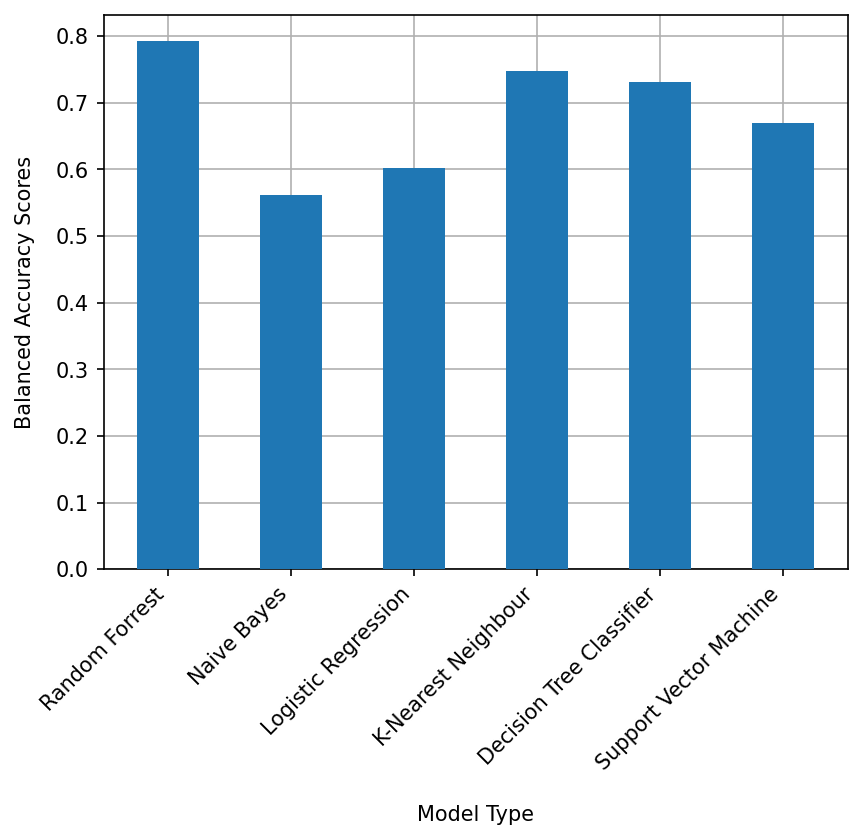

In [588]:
# Plot the balanced accuracy scores to compare the different models
balanced_accuracy_scores = [rfc_ba, gnb_ba, reg_ba, knn_ba, dtc_ba, svc_ba]
models = ['Random Forrest', 'Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree Classifier', 'Support Vector Machine']
plt.rcParams['figure.dpi']=150
plt.bar(models, balanced_accuracy_scores, width = 0.5, zorder = 3)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(zorder = 0)
plt.xlabel('Model Type', labelpad = 15)
plt.ylabel('Balanced Accuracy Scores', labelpad = 10)
plt.show()

## Chosen Model - Model 4: Random Forrest Classifier Model with Doubled and Oversampled Dataset

This model was chosen because of out of all 7 models which were tested, this one has the highest balanced accuracy score of 0.7720059162136232.

In [569]:
# Generate a confusion matrix for the chosen model
confusion_matrix(y_test2, rfcpredictions_4)

array([[ 340,   82],
       [ 313, 1105]])

In [570]:
# Evaluate the model's performance with a classification report
print(classification_report(y_test2, rfcpredictions_4, target_names = ['Successful', 'Unsuccessful']))

              precision    recall  f1-score   support

  Successful       0.52      0.81      0.63       422
Unsuccessful       0.93      0.78      0.85      1418

    accuracy                           0.79      1840
   macro avg       0.73      0.79      0.74      1840
weighted avg       0.84      0.79      0.80      1840



In [571]:
## Generate a confusion matrix for the second best model
confusion_matrix(y_test2, dtcpredictions)

array([[321, 101],
       [421, 997]])

In [572]:
# Evaluate the second best model's performance with a classification report
print(classification_report(y_test2, dtcpredictions, target_names = ['Successful', 'Unsuccessful']))

              precision    recall  f1-score   support

  Successful       0.43      0.76      0.55       422
Unsuccessful       0.91      0.70      0.79      1418

    accuracy                           0.72      1840
   macro avg       0.67      0.73      0.67      1840
weighted avg       0.80      0.72      0.74      1840



Comparing the two classification reports above, first for the chosen model (random forrest classifier) and second for the second best model (decision tree classifier), it is clear that the chosen model performs better. The precision and recall scores are overall higher for the chosen model, along with the balanced accuracy scores, indicating a clear winner.

In [573]:
# Examine which variables contribute most to the model's result
sorted(list(zip(rfc_4.feature_importances_, X.columns)), reverse=True)

[(0.20593104717931376, 'budget'),
 (0.17020452828135574, 'runtime'),
 (0.12786561634138052, 'anticipated_vote_rating'),
 (0.11329338139431884, 'anticipated_popularity'),
 (0.1016737598474427, 'month'),
 (0.05014319798074705, 'post_streaming'),
 (0.022732109976678676, 'Drama'),
 (0.018978495701371546, 'Comedy'),
 (0.018045707453718203, 'Action'),
 (0.017773657407970794, 'Thriller'),
 (0.017357200228371734, 'Family'),
 (0.017254451844650492, 'Science Fiction'),
 (0.013196185237484385, 'Fantasy'),
 (0.013113814304091843, 'Adventure'),
 (0.012479399569018708, 'Crime'),
 (0.012227654678703775, 'Romance'),
 (0.010160860567493763, 'Mystery'),
 (0.009289254101916802, 'fl'),
 (0.009238484099849627, 'en'),
 (0.007712963192770516, 'Animation'),
 (0.007567425113745723, 'Horror'),
 (0.005965071245034827, 'Western'),
 (0.00580787825844887, 'History'),
 (0.005500249752832491, 'War'),
 (0.005458117108868459, 'Music'),
 (0.001029489132420099, 'Documentary')]

In [589]:
# Save the model to be used for the index.html
with open('assets/model_rfc.pkl', 'wb') as f: 
    pickle.dump(rfc_4, f)

In [590]:
# Save the scaler model to be used to scale the input data
with open('assets/scaler.pkl', 'wb') as f: 
    pickle.dump(X_scaler_2, f)